<a href="https://colab.research.google.com/github/rawanMahmoud81/Machine-Learning-Data-analysis/blob/main/Sales_Dashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [ ]:
df = pd.read_excel('/content/01JCB2BSDPB63MRTR5AM9BA5CV.xlsx')
df.head()

,Order_ID,Order_Date,Product_ID,Sales_Rep_ID,Region_ID,Quantity_Sold,Unit_Price,Total_Sales,Profit,Return_Flag,Time,Year,Month,Day_of_Week,Hour
0,1001,2024-09-05,202,305,101,2,356.820,713.64,135.5916,False,23:47,2024,9,Thursday,23
1,1002,2023-12-13,204,301,105,1,33.690,33.69,7.0749,False,16:50,2023,12,Wednesday,16
2,1003,2023-09-17,201,303,101,3,172.950,518.85,129.7125,False,09:00,2023,9,Sunday,9
3,1004,2022-12-24,204,301,105,2,259.515,519.03,155.7090,False,06:50,2022,12,Saturday,6
4,1005,2023-08-05,202,303,102,2,129.885,259.77,38.9655,False,10:42,2023,8,Saturday,10


In [ ]:
df.isnull().sum()

,0
Order_ID,0
Product_ID,0
Sales_Rep_ID,0
Region_ID,0
Quantity_Sold,0
Unit_Price,0
Total_Sales,0
Profit,0
Return_Flag,0
Time,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.nunique()

,0
Order_ID,2000
Order_Date,695
Product_ID,5
Sales_Rep_ID,5
Region_ID,5
Quantity_Sold,10
Unit_Price,1926
Total_Sales,1987
Profit,1997
Return_Flag,2


In [ ]:
# Calculate month-over-month (MoM) and year-over-year (YoY) sales growth rates.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df = pd.read_excel('/content/01JCB2BSDPB63MRTR5AM9BA5CV.xlsx')

# Convert 'Date' column to datetime objects if it's not already
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

# Set 'Date' as index
df = df.set_index('Order_Date')

# Resample to monthly frequency and sum sales
monthly_sales = df['Total_Sales'].resample('M').sum()

# Calculate MoM growth rate
monthly_growth = monthly_sales.pct_change() * 100

# Resample to yearly frequency and sum sales
yearly_sales = df['Total_Sales'].resample('Y').sum()

# Calculate YoY growth rate
yearly_growth = yearly_sales.pct_change() * 100

print("Monthly Sales:\n", monthly_sales)
print("\nMonthly Growth Rate:\n", monthly_growth)
print("\nYearly Sales:\n", yearly_sales)
print("\nYearly Growth Rate:\n", yearly_growth)

Monthly Sales:
 Order_Date
2022-10-31     20234.310
2022-11-30    107849.430
2022-12-31    138990.180
2023-01-31    104007.855
2023-02-28     87826.770
2023-03-31    113163.450
2023-04-30     99205.680
2023-05-31    113251.875
2023-06-30    111909.480
2023-07-31    104860.950
2023-08-31    104936.430
2023-09-30    125126.235
2023-10-31     94481.160
2023-11-30    107367.045
2023-12-31    125243.640
2024-01-31     95051.295
2024-02-29    109232.490
2024-03-31     82463.100
2024-04-30    103189.515
2024-05-31    115740.750
2024-06-30    125447.205
2024-07-31    105273.765
2024-08-31    115886.970
2024-09-30     90404.430
2024-10-31     93415.875
Freq: ME, Name: Total_Sales, dtype: float64

Monthly Growth Rate:
 Order_Date
2022-10-31           NaN
2022-11-30    433.002756
2022-12-31     28.874283
2023-01-31    -25.168918
2023-02-28    -15.557561
2023-03-31     28.848471
2023-04-30    -12.334168
2023-05-31     14.158660
2023-06-30     -1.185318
2023-07-31     -6.298421
2023-08-31      0.07

In [ ]:
# Calculate the average order size
average_order_size = df['Total_Sales'].sum() / df['Quantity_Sold'].sum()

print(f"The average order size is: {average_order_size}")

The average order size is: 239.74864951025685


In [ ]:
# Add a column for Profit

df['Profit'] = df['Total_Sales'] * 0.20

print(df.head())

            Order_ID  Product_ID  Sales_Rep_ID  Region_ID  Quantity_Sold  \
Order_Date                                                                 
2024-09-05      1001         202           305        101              2   
2023-12-13      1002         204           301        105              1   
2023-09-17      1003         201           303        101              3   
2022-12-24      1004         204           301        105              2   
2023-08-05      1005         202           303        102              2   

            Unit_Price  Total_Sales   Profit  Return_Flag   Time  Year  Month  \
Order_Date                                                                      
2024-09-05     356.820       713.64  142.728        False  23:47  2024      9   
2023-12-13      33.690        33.69    6.738        False  16:50  2023     12   
2023-09-17     172.950       518.85  103.770        False  09:00  2023      9   
2022-12-24     259.515       519.03  103.806        False  06:

In [ ]:
# Sales by Time of Day: Analyze sales trends by time (morning, afternoon, evening, night) based on the Time column.

import pandas as pd

def categorize_time(time_str):
    hour = int(time_str.split(':')[0])  # Extract hour from the time string
    if 0 <= hour < 6:
        return 'Night'
    elif 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

# Apply the function to create a new 'TimeOfDay' column
df['TimeOfDay'] = df['Time'].apply(categorize_time)


# Group by 'TimeOfDay' and sum sales
sales_by_time = df.groupby('TimeOfDay')['Total_Sales'].sum()

sales_by_time


,Total_Sales
TimeOfDay,
Afternoon,663304.050
Evening,632393.085
Morning,657422.430
Night,641440.320


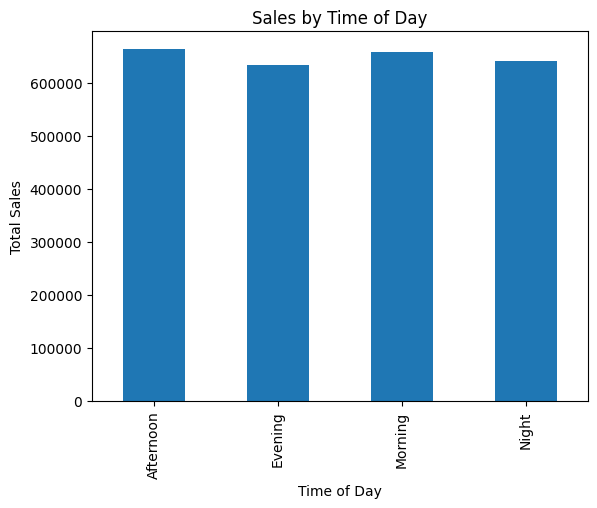

In [ ]:
 import matplotlib.pyplot as plt
 sales_by_time.plot(kind='bar')
 plt.title('Sales by Time of Day')
 plt.xlabel('Time of Day')
 plt.ylabel('Total Sales')
 plt.show()

In [ ]:
# ●	KPIs Summary Section: Include the following metrics as KPIs:
# ○	Total Sales
# ○	Total Quantity Sold
# ○	Total Profit
# ○	Average Order Size
# ○	Sales Growth Rate
# ○	Return Rate

import pandas as pd


total_sales = df['Total_Sales'].sum()

total_quantity_sold = df['Quantity_Sold'].sum()

total_profit = df['Profit'].sum()

average_order_size = df['Total_Sales'].sum() / df['Quantity_Sold'].sum()

sales_growth_rate = monthly_growth.mean()

if 'Returned' in df.columns:
    return_rate = (df['Returned'].sum() / df['Quantity_Sold'].sum()) * 100
else:
    return_rate = "Return data not available"

print("KPIs Summary:")
print(f"Total Sales: {total_sales}")
print(f"Total Quantity Sold: {total_quantity_sold}")
print(f"Total Profit: {total_profit}")
print(f"Average Order Size: {average_order_size}")
print(f"Sales Growth Rate (Monthly Average): {sales_growth_rate:.2f}%")
print(f"Return Rate: {return_rate}")

KPIs Summary:
Total Sales: 2594559.885
Total Quantity Sold: 10822
Total Profit: 518911.9770000001
Average Order Size: 239.74864951025685
Sales Growth Rate (Monthly Average): 19.03%
Return Rate: Return data not available


In [ ]:
# ●	Top Products, Regions, and Customers:
# ○	Top 2 products by total sales
# ○	Top 2 regions by total sales
# ○	Top 2 customers by total sales

# Top 2 products by total sales
top_products = df.groupby('Product_ID')['Total_Sales'].sum().nlargest(2)
print("Top 2 Products by Total Sales:\n", top_products)

# Top 2 regions by total sales
top_regions = df.groupby('Region_ID')['Total_Sales'].sum().nlargest(2)
print("\nTop 2 Regions by Total Sales:\n", top_regions)

# Top 2 customers by total sales
top_customers = df.groupby('Order_ID')['Total_Sales'].sum().nlargest(2)
print("\nTop 2 Customers by Total Sales:\n", top_customers)

Top 2 Products by Total Sales:
 Product_ID
202    553454.970
204    521614.185
Name: Total_Sales, dtype: float64

Top 2 Regions by Total Sales:
 Region_ID
105    538904.190
101    529320.375
Name: Total_Sales, dtype: float64

Top 2 Customers by Total Sales:
 Order_ID
2348    4488.6
2746    4422.3
Name: Total_Sales, dtype: float64


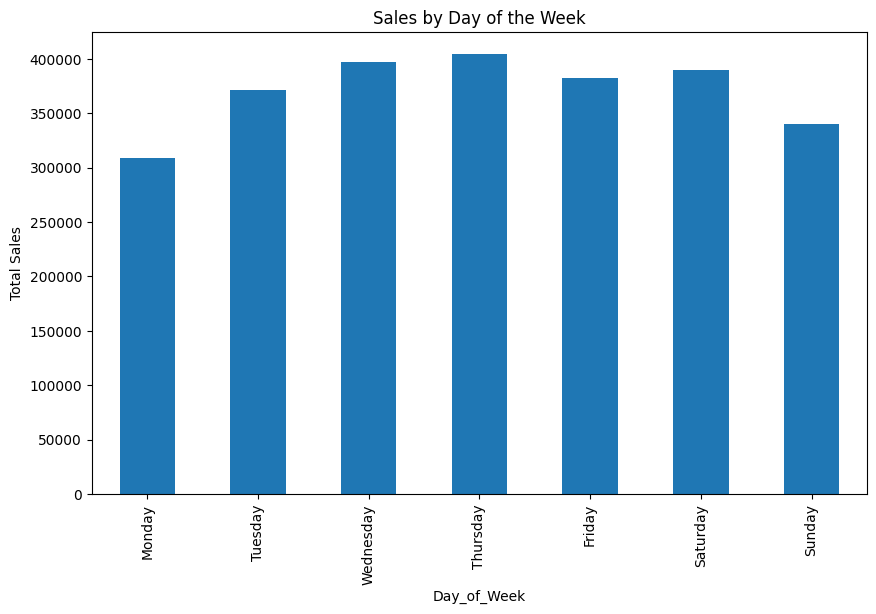

In [ ]:
# ●	Time-Based Sales Analysis:
# ○	Sales by day of the week (to determine peak days)
# ○	Sales by time of day (morning, afternoon, evening, night)

# Sales by Day of the Week
df['Day_of_Week'] = df.index.dayofweek # Monday=0, Sunday=6
sales_by_day = df.groupby('Day_of_Week')['Total_Sales'].sum()
sales_by_day.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(10, 6))
sales_by_day.plot(kind='bar')
plt.title('Sales by Day of the Week')
plt.xlabel('Day_of_Week')
plt.ylabel('Total Sales')
plt.show()


Sales Rep Performance:
               Total_Sales  Quantity_Sold
Sales_Rep_ID                            
303            577630.485           2332
304            530219.085           2180
302            504918.315           2182
305            495960.990           2060
301            485831.010           2068


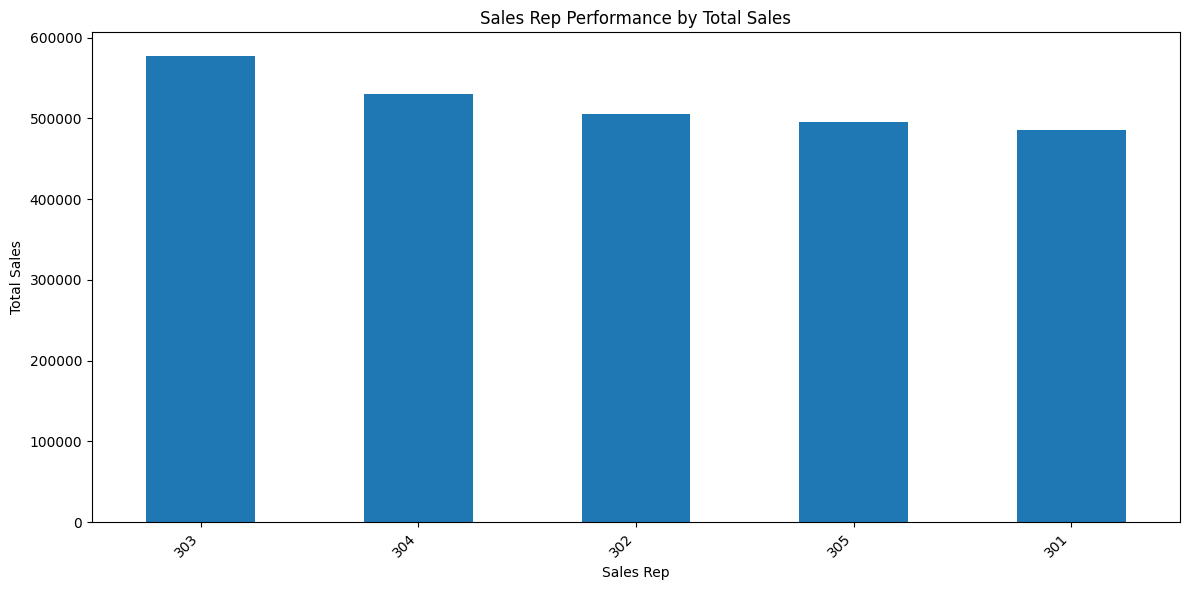

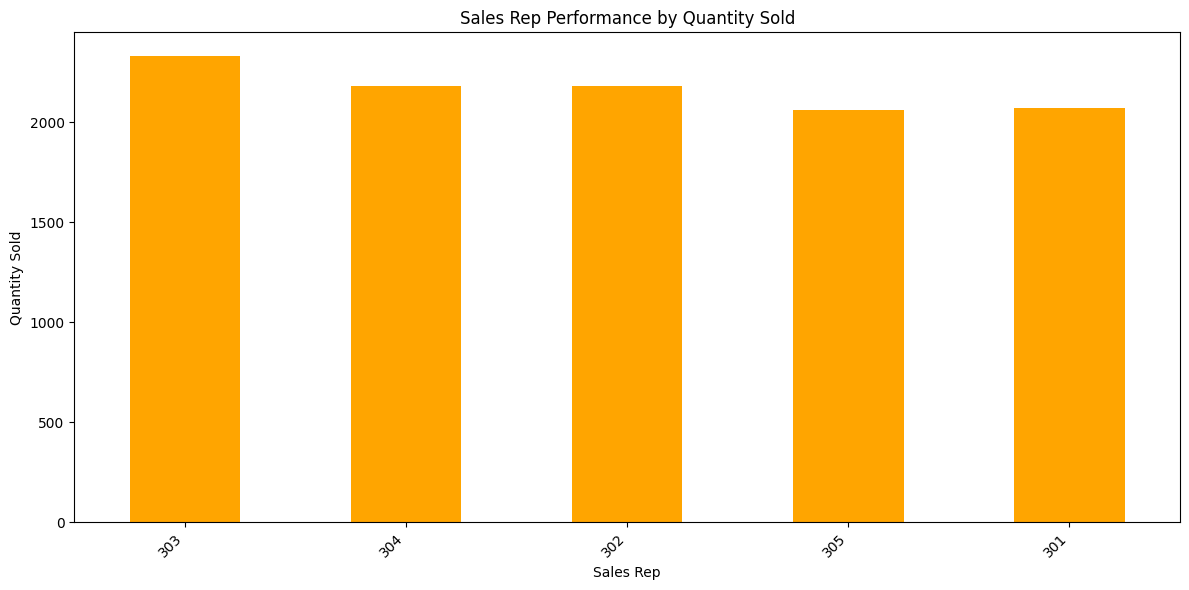

In [ ]:
# Sales Rep Performance: Ranked list or chart showing sales reps by their total sales and quantity sold.

sales_rep_performance = df.groupby('Sales_Rep_ID')[['Total_Sales', 'Quantity_Sold']].sum().sort_values(by='Total_Sales', ascending=False)

sales_rep_performance_list = sales_rep_performance.reset_index().to_records(index=False).tolist()
print("\nSales Rep Performance:\n", sales_rep_performance)

plt.figure(figsize=(12, 6))
sales_rep_performance['Total_Sales'].plot(kind='bar')
plt.title('Sales Rep Performance by Total Sales')
plt.xlabel('Sales Rep')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

plt.figure(figsize=(12, 6))
sales_rep_performance['Quantity_Sold'].plot(kind='bar', color='orange')
plt.title('Sales Rep Performance by Quantity Sold')
plt.xlabel('Sales Rep')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# prompt: . Interactive Filtering & Slicers
# ●	Slicers: Add slicers for:
# ○	Product Category
# ○	Region
# ○	Sales Rep
# ○	Time of Day (Morning, Afternoon, Evening, Night)
# ●	Dynamic Filtering: Allow the dashboard to update dynamically when filtered by any slicer

import ipywidgets as widgets
from IPython.display import display

# Create Slicers
product_category_slicer = widgets.Dropdown(
    options=sorted(df['Product_ID'].unique()),
    description='Product Category:',
)

region_slicer = widgets.Dropdown(
    options=sorted(df['Region_ID'].unique()),
    description='Region:',
)

sales_rep_slicer = widgets.Dropdown(
    options=sorted(df['Sales_Rep_ID'].unique()),
    description='Sales Rep:',
)

time_of_day_slicer = widgets.Dropdown(
    options=['Morning', 'Afternoon', 'Evening', 'Night'],
    description='Time of Day:',
)


# Function to update the dashboard based on slicer selections
def update_dashboard(change):
    selected_product = product_category_slicer.value
    selected_region = region_slicer.value
    selected_sales_rep = sales_rep_slicer.value
    selected_time = time_of_day_slicer.value

    # Apply filters
    filtered_df = df.copy() #create a copy to prevent SettingWithCopyWarning
    if selected_product != '': #handle empty string, otherwise comparison fails
        filtered_df = filtered_df[filtered_df['Product_ID'] == selected_product]
    if selected_region != '':
        filtered_df = filtered_df[filtered_df['Region_ID'] == selected_region]
    if selected_sales_rep != '':
        filtered_df = filtered_df[filtered_df['Sales_Rep_ID'] == selected_sales_rep]
    if selected_time != '':
        filtered_df = filtered_df[filtered_df['TimeOfDay'] == selected_time]

    print(f"Total Sales after filtering: {filtered_df['Total_Sales'].sum()}")

# Observe slicer changes
product_category_slicer.observe(update_dashboard, names='value')
region_slicer.observe(update_dashboard, names='value')
sales_rep_slicer.observe(update_dashboard, names='value')
time_of_day_slicer.observe(update_dashboard, names='value')


# Display Slicers
display(product_category_slicer)
display(region_slicer)
display(sales_rep_slicer)
display(time_of_day_slicer)

Dropdown(description='Product Category:', options=(201, 202, 203, 204, 205), value=201)

Dropdown(description='Region:', options=(101, 102, 103, 104, 105), value=101)

Dropdown(description='Sales Rep:', options=(301, 302, 303, 304, 305), value=301)

Dropdown(description='Time of Day:', options=('Morning', 'Afternoon', 'Evening', 'Night'), value='Morning')

Total Sales after filtering: 4424.16
Total Sales after filtering: 5939.849999999999
Total Sales after filtering: 11327.565


In [ ]:
# ●	Slicers: Add slicers for:
# ○	Date (Year/Month)
# ○ Dynamic Filtering: Allow the dashboard to update dynamically when filtered by any slicer

# Create a date slicer (Year/Month)
df['YearMonth'] = df.index.to_period('M')  # Create a YearMonth column
year_month_options = sorted(df['YearMonth'].unique().astype(str))
year_month_slicer = widgets.Dropdown(
    options=year_month_options,
    description='Year/Month:',
)

# Function to update the dashboard based on slicer selections (modified)
def update_dashboard(change):
    selected_product = product_category_slicer.value
    selected_region = region_slicer.value
    selected_sales_rep = sales_rep_slicer.value
    selected_time = time_of_day_slicer.value
    selected_year_month = year_month_slicer.value

    # Apply filters
    filtered_df = df.copy()
    if selected_product != '':
        filtered_df = filtered_df[filtered_df['Product_ID'] == selected_product]
    if selected_region != '':
        filtered_df = filtered_df[filtered_df['Region_ID'] == selected_region]
    if selected_sales_rep != '':
        filtered_df = filtered_df[filtered_df['Sales_Rep_ID'] == selected_sales_rep]
    if selected_time != '':
        filtered_df = filtered_df[filtered_df['TimeOfDay'] == selected_time]
    if selected_year_month != '':
        filtered_df = filtered_df[filtered_df['YearMonth'].astype(str) == selected_year_month]

    # Update KPIs or visualizations using filtered_df here
    print(f"Total Sales after filtering: {filtered_df['Total_Sales'].sum()}")


# Observe the new slicer
year_month_slicer.observe(update_dashboard, names='value')

# Display the new slicer
display(year_month_slicer)


Dropdown(description='Year/Month:', options=('2022-10', '2022-11', '2022-12', '2023-01', '2023-02', '2023-03',…

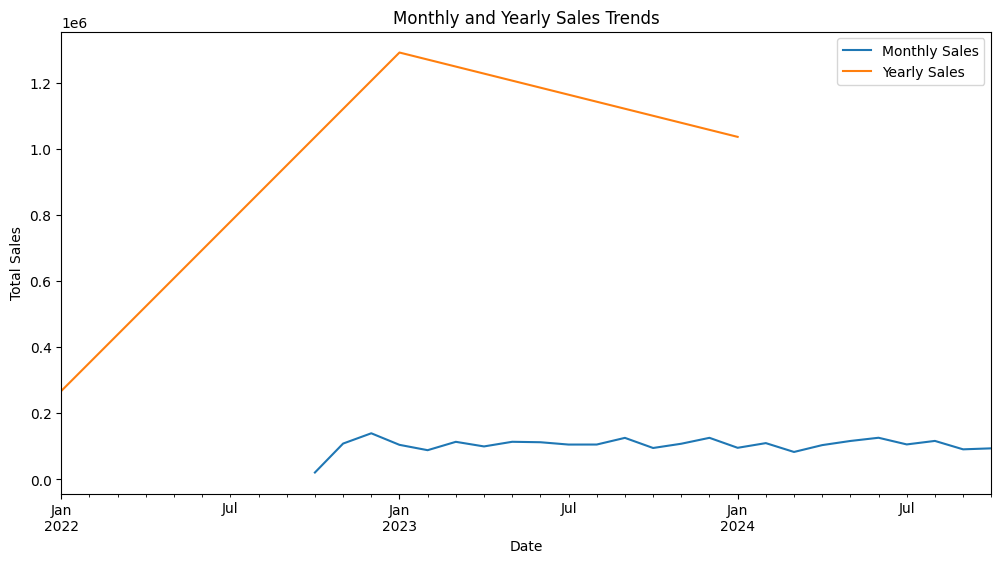

In [ ]:
# Data Visualization
# Monthly and Yearly Sales Trends: Line or area chart showing monthly and yearly sales trends.

import matplotlib.pyplot as plt

# Monthly and Yearly Sales Trends
plt.figure(figsize=(12, 6))
monthly_sales.plot(label='Monthly Sales')
yearly_sales.plot(label='Yearly Sales')
plt.title('Monthly and Yearly Sales Trends')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

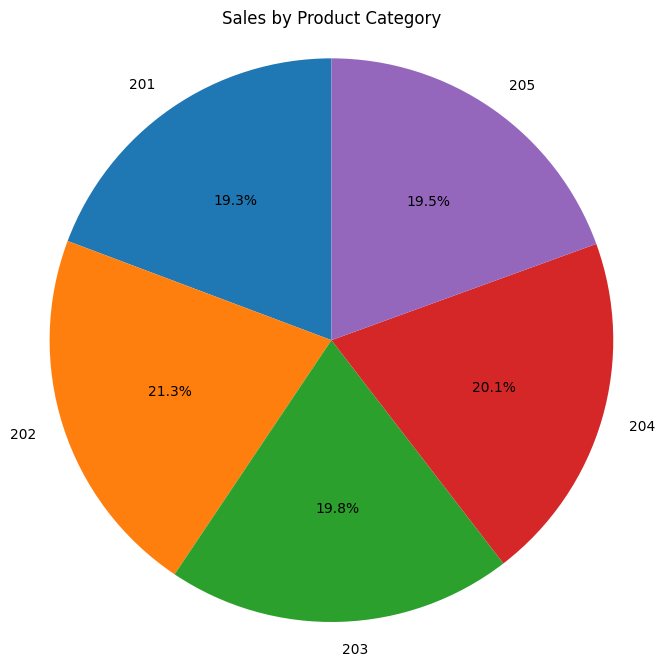

In [ ]:
# Data Visualization  ●	Sales by Product Category: Pie or donut chart displaying the share of total sales for each product category

import matplotlib.pyplot as plt

sales_by_category = df.groupby('Product_ID')['Total_Sales'].sum()

plt.figure(figsize=(8, 8))
plt.pie(sales_by_category, labels=sales_by_category.index, autopct='%1.1f%%', startangle=90)
plt.title('Sales by Product Category')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

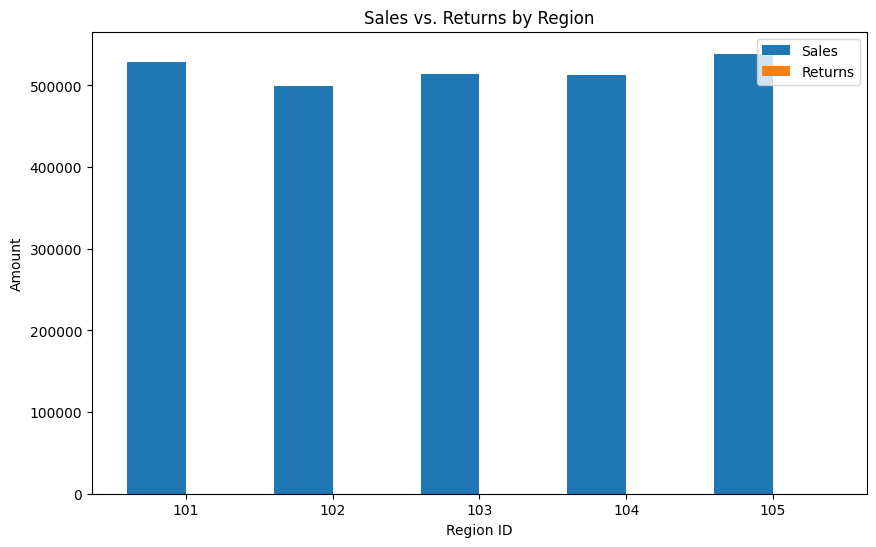

In [ ]:
# Data Visualization  ●	Sales vs. Returns: A bar chart comparing total sales and returns across regions.

import matplotlib.pyplot as plt

sales_by_region = df.groupby('Region_ID')['Total_Sales'].sum()
returns_by_region = df.groupby('Region_ID')['Return_Flag'].sum()  # Assuming 'Returned' represents return quantity

# Create the bar chart
plt.figure(figsize=(10, 6))
X_axis = np.arange(len(sales_by_region.index))

plt.bar(X_axis - 0.2, sales_by_region, 0.4, label='Sales')
plt.bar(X_axis + 0.2, returns_by_region, 0.4, label='Returns')


plt.xticks(X_axis, sales_by_region.index)  # Set x-axis tick labels to region IDs
plt.xlabel("Region ID")
plt.ylabel("Amount")
plt.title("Sales vs. Returns by Region")
plt.legend()
plt.show()

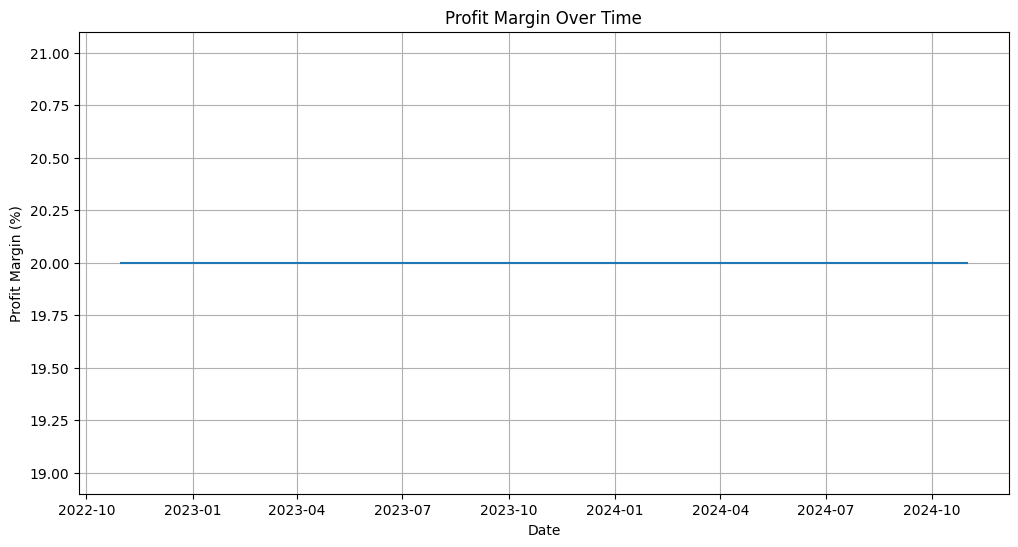

In [ ]:
# Data Visualization ●	Profit Margin Analysis: A line chart showing profit margins over time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

warnings.filterwarnings('ignore')

df['Profit_Margin'] = (df['Profit'] / df['Total_Sales']) * 100

# Resample to monthly profit margin
monthly_profit_margin = df.resample('M')['Profit_Margin'].mean()

# Plot the profit margin over time
plt.figure(figsize=(12, 6))
plt.plot(monthly_profit_margin.index, monthly_profit_margin.values)
plt.xlabel('Date')
plt.ylabel('Profit Margin (%)')
plt.title('Profit Margin Over Time')
plt.grid(True)
plt.show()

In [ ]:
#  Dashboard Insights & Analysis
# ●	Actionable Insights: Write 3 observations based on the data, like identifying peak sales hours, best-performing products, or sales spikes by day.
# ●	Recommendations: Provide 2 recommendations for sales improvement, such as increasing marketing during peak hours, focusing on high-profit products, or targeting specific customer segments

# Actionable Insights
# 1. Peak Sales Hours: Analyze 'sales_by_time' to identify the time of day with the highest total sales.
#    This suggests optimal times for targeted marketing or staffing.
# 2. Best-Performing Products: Examine 'top_products' to identify top-selling products.
#    Focus marketing or inventory on these high-performing items.
# 3. Sales Spikes by Day: Observe 'sales_by_day' to pinpoint days of the week with significantly higher sales.
#    Consider promotions or special offers on these peak days.

# Recommendations
# 1. Targeted Marketing Campaigns: Based on peak sales hours (Insight #1), implement targeted
#    marketing campaigns or promotions during those periods to maximize customer reach and sales.
# 2. Inventory Optimization: Prioritize inventory of the best-performing products (Insight #2).
#    Ensure sufficient stock levels to meet customer demand, and consider allocating more shelf space
#    or prominent placement to these items.